In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

from numpy import linalg as LA

In [2]:
# Define the tickers
tickers = ['XLK','XLC','XLV','XLE','XLY','XLI','XLB','XLF','XLU','XLP']
labels = ['Technology', 'Communication', 'Healthcare', 'Energy', 'Consumer Disc.', 'Industrial', 'Material', 'Financial', 'Utility', 'Consumer Staples']


In [4]:
# Fetch historical data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Collect data
data = fetch_data(tickers, '2021-09-01', '2024-09-01')
spy = fetch_data(['SPY'], '2021-09-01', '2024-09-01')

# Drop rows with missing data
data = data.dropna()
spy = spy.dropna()

# Calculate daily returns
returns = data.pct_change().fillna(0)
spy_returns = spy.pct_change().fillna(0)


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


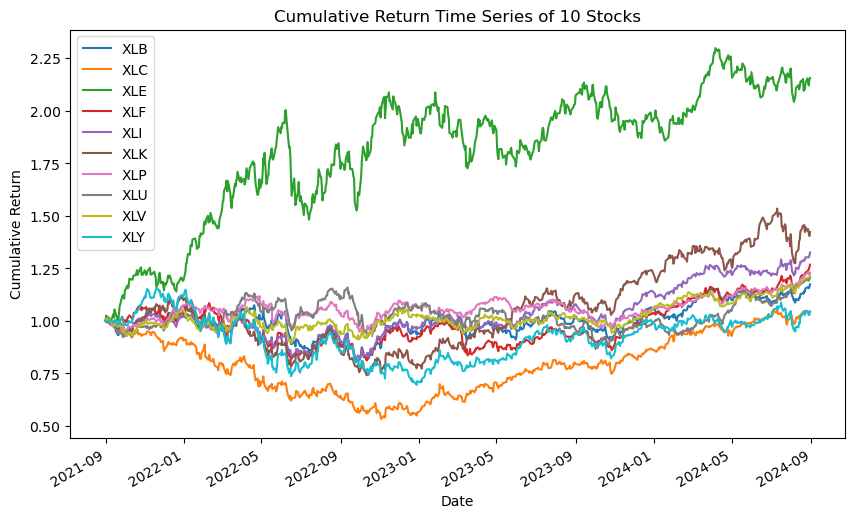

In [12]:
cum_returns = (1 + returns).cumprod()
df_cum_returns = (1+returns).cumprod()

df_cum_returns.plot(figsize=(10,6))
plt.legend(title="Stocks", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Time Series of 10 Stocks")
plt.show()

Singular values: [0.88967965 0.44330006 0.32866899 0.21017833 0.19267674 0.18086956
 0.1635566  0.13695274 0.12681581 0.10421887]
VT (transposed): [[-0.32982363  0.11483727 -0.14659958  0.36041658 -0.13097183  0.02965188
  -0.47613221  0.57549107 -0.12507706 -0.36751633]
 [-0.37709655 -0.26358395  0.20364718 -0.47377069 -0.66817049 -0.25075908
  -0.01922278  0.07931181  0.05435378  0.05869166]
 [-0.27943673  0.84913727  0.35566212 -0.22799648  0.09292022 -0.00613998
   0.11582822  0.01610302 -0.00141382 -0.00732961]
 [-0.32010312  0.09263877 -0.09462526  0.47498436 -0.32299587  0.00169145
   0.10949617 -0.67027879  0.08539577 -0.28548778]
 [-0.30437699  0.06362112 -0.11272723  0.28466183 -0.0264889   0.07220939
  -0.21253306 -0.0046352   0.10611491  0.86440685]
 [-0.42374038 -0.30704914  0.25095733 -0.21887093  0.33258607  0.64792413
  -0.19037769 -0.1550364   0.09464459 -0.12499651]
 [-0.1728437   0.02081404 -0.37210225 -0.02977756  0.03417262  0.0978902
   0.45371837  0.30169932  0.7

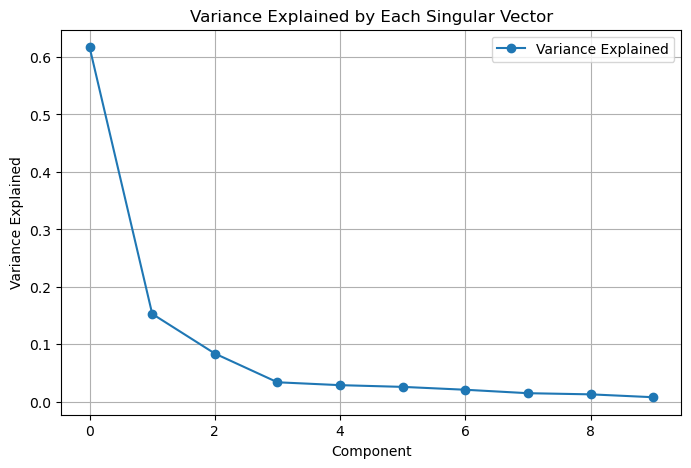

In [13]:
# Normalize the data
# returns_normalized = (returns - returns.mean()) / returns.std()
# spy_returns_normalized = (spy_returns-spy_returns.mean()) / spy_returns.std()

# Perform SVD using numpy.linalg
U, S, VT = LA.svd(returns)

# Print results
print("Singular values:", S)
print("VT (transposed):", VT.T)

# Compute variance explained by each singular vector
var_explained = np.round(S**2 / np.sum(S**2), decimals=3)
print('Variance explained by each singular vector:', var_explained)

# Plot the variance explained
plt.figure(figsize=(8, 5))
plt.plot(var_explained, 'o-', label='Variance Explained')
plt.title('Variance Explained by Each Singular Vector')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print("First Eigenfactor  VT[0] = ", VT[0])
weight_factor_1 = abs(VT[0]) / sum(abs(VT[0]))
print("First Eigen portfolio weight = "weight_factor_1)

[0.10857789 0.12414013 0.09199053 0.1053779  0.10020086 0.13949527
 0.05690012 0.06396051 0.06684314 0.14251364]


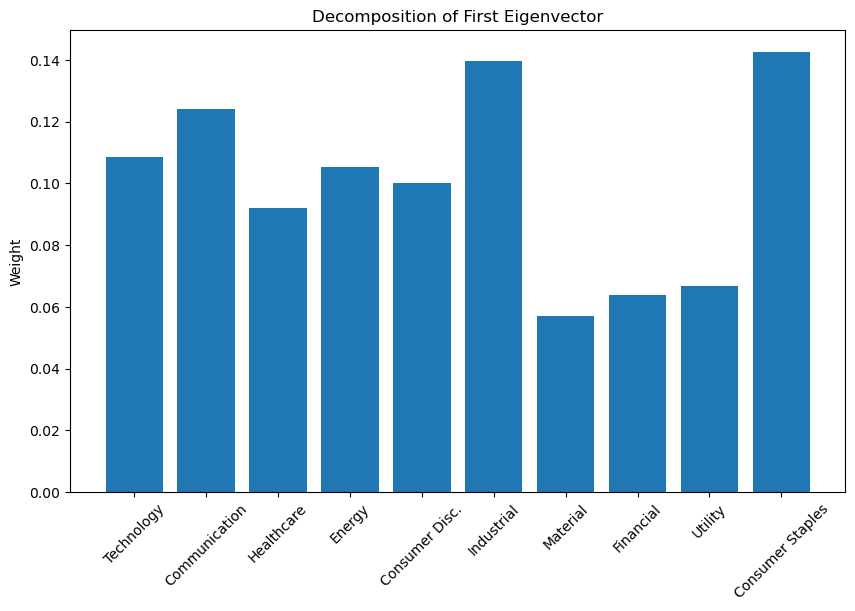

In [17]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, weight_factor_1)

# Adding labels and title
# plt.xlabel("Sectors")
plt.ylabel("Weight")
plt.xticks(rotation=45)

plt.title("Decomposition of First Eigenvector")

# Show the plot
plt.show()

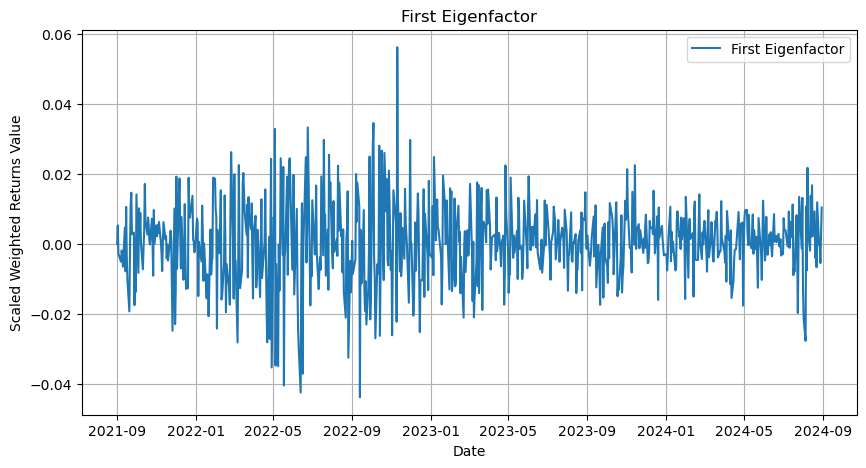

In [18]:
#First Eigenfactor
weighted_returns = returns.mul(weight_factor_1, axis=1)
scaled_weighted_returns = weighted_returns.div(np.sqrt(S[0]))


plt.figure(figsize=(10, 5))
plt.plot(scaled_weighted_returns.sum(axis=1), label='First Eigenfactor')
plt.title('First Eigenfactor')
plt.xlabel('Date')
plt.ylabel('Scaled Weighted Returns Value')
plt.legend()
plt.grid(True)
plt.show()


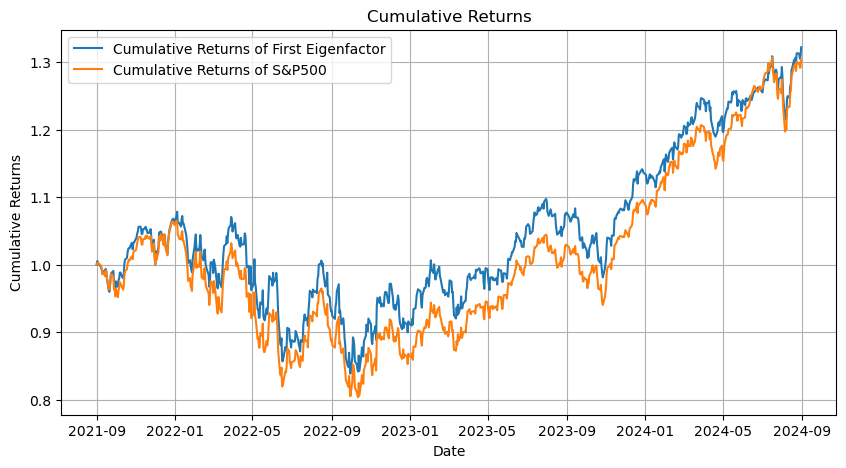

In [19]:
cumulative_returns = (1 + scaled_weighted_returns.sum(axis=1)).cumprod()
spy_cumulative_returns = (1 + spy_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns of First Eigenfactor')

plt.plot(spy_cumulative_returns, label = 'Cumulative Returns of S&P500')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


Correlation of each stock's cumulative returns with the cumulative returns of the first eigenfactor:
Ticker
XLB    0.904992
XLC    0.861853
XLE    0.453546
XLF    0.889003
XLI    0.974443
XLK    0.975051
XLP    0.722646
XLU    0.256539
XLV    0.892860
XLY    0.675582
dtype: float64


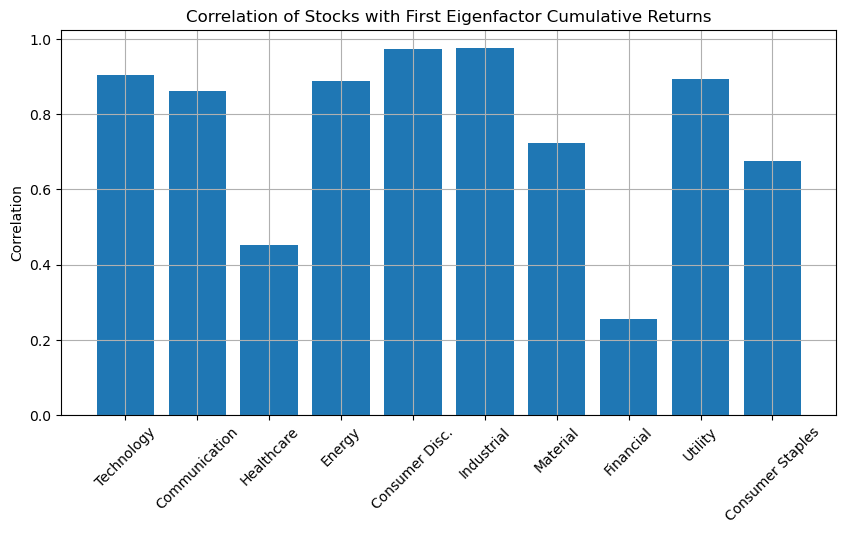

In [24]:
# Calculate cumulative returns for each stock
cumulative_returns_stocks = (1 + returns).cumprod()

# Ensure the cumulative returns of the eigenfactor is aligned in terms of dates with original data
cumulative_returns_aligned = cumulative_returns.loc[returns.index]

# Compute the correlation of each stock's cumulative returns with the eigenfactor cumulative returns
correlations = cumulative_returns_stocks.corrwith(cumulative_returns_aligned)

# Print the correlation results
print("Correlation of each stock's cumulative returns with the cumulative returns of the first eigenfactor:")
print(correlations)

# Optional: Plot the correlations as a bar chart for better visualization
plt.figure(figsize=(10, 5))
plt.bar(labels, correlations)
plt.title('Correlation of Stocks with First Eigenfactor Cumulative Returns')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
